In [1]:
pip install eml_parser

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install urlextract

Note: you may need to restart the kernel to use updated packages.


In [3]:
#pip install HTMLParser 

In [4]:
import datetime
import json
import eml_parser
from bs4 import BeautifulSoup
from urlextract import URLExtract
import re
import glob  
import lxml.html
from urllib.parse import urlparse
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np
import seaborn as sns

## Data pre-processing

In [5]:
def json_serial(obj):
  if isinstance(obj, datetime.datetime):
      serial = obj.isoformat()
      return serial

def Find(string):
  
    regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
    url = re.findall(regex,string)      
    return [x[0] for x in url]

import os, os.path
import requests

# simple version for working with CWD
x= len([name for name in os.listdir('C:/Users/patel/Desktop/internship/dataset/Phishing Dataset/phishing')])
print(x)
header=[]
body=[]

url=[]
img_url=[]
agree=[]
paypal=[]
login=[]
bank=[]
verify=[]
suspend=[]
dear=[]
account=[]
html=[]
body_list=[]
text_link_difference=[]

f=0

img_ext=['.gif','.png','.jpg','.jpeg','.psd','.raw','.heif','.bmp']

for name in glob.glob(r'C:/Users/patel/Desktop/internship/dataset/Phishing Dataset/phishing/*[0-9].*'):
    u=[]
    p=[]
    a=0
    pa=0
    l=0
    b=0
    v=0
    s=0
    d=0
    ac=0
    h=0
    f+=1
    try:
        #with open('../content/drive/MyDrive/internship/Phishing Dataset/phishing/'+str(i)+'.eml', 'rb') as fhdl:
        with open(name, 'rb') as fhdl:
          raw_email = fhdl.read()
        output = str(raw_email, 'cp1252')
        email_list=output.split('\n')
        #print(f)
        '''
        #textlinkdifference
        if 'href' in output:
            for j in email_list:
                if 'href' in j: 
                    p=Find(j)
                    #print(p)
                    if [x for x in p if p.count(x) > 1]!=[]:
                        text_link_difference.append(1)
                    else:
                        text_link_difference.append(0)
        else:
            text_link_difference.append(0)
        '''
        
        k=0
        body=''
        for j in email_list:
            if j=='':
                k=1
                continue
            if k==1:
                body=body+j+'\n'
        body_list.append(body)
        
        
        #body is html or not
        if bool(BeautifulSoup(body, "html.parser").find()):
            html.append(1)
        else:
            html.append(0)
        
        #check word is present or not in email
        if 'agree' in output.lower():
            a=1
        if 'paypal' in output.lower():
            pa=1
        if 'login' in output.lower():
            l=1
        if 'bank' in output.lower():
            b=1
        if 'suspend' in output.lower():
            s=1
        if 'dear' in output.lower():
            d=1
        if 'account' in output.lower():
            ac=1
        if 'verify' in output.lower():
            v=1
            
        '''
        p=Find(output)
        
        #print(x)
        for i in p:
            for j in img_ext:
                if j in i:
                    u.append(i)
                    p.remove(i)
        '''
    except:
        continue
        
    agree.append(a)
    paypal.append(pa)
    bank.append(b)
    suspend.append(s)
    dear.append(d)
    account.append(ac)
    verify.append(v)
    html.append(h)
    url.append(p)
    login.append(l)
    img_url.append(u)

2237


In [6]:
len(url)

2235

In [7]:
ip_url=[]
hex_url=[]
for i in url:
    count=0
    count2=0
    for j in i:
        
        #count hexadecimal character in url
        t=re.findall (r'x[0-9a-fA-F]+', j)
        if t!=[]:
            count2+=1
            
        #count IP url
        regex = r"(?:https?://[0-9.]+/)"
        x = re.findall(regex,j)
        if x:
            count+=1
    ip_url.append(count)
    hex_url.append(count2)

In [8]:

#unique domain
domain=[]
for i in url:
    l=[]
    for j in i:
        d = urlparse(j).netloc
        l.append(d)
    domain.append(len(set(l)))

In [9]:
#maximum dot in url
dot=[]
for i in url:
    count=0
    for j in i:
        l=j.split('.')
        count=max(len(l),count)
    dot.append(count)

In [10]:
count=0
x= len([name for name in os.listdir('C:/Users/patel/Desktop/internship/dataset/Phishing Dataset/normal')])
print(x)
n_header=[]
n_body=[]

n_url=[]
n_img_url=[]
n_agree=[]
n_paypal=[]
n_login=[]
n_bank=[]
n_verify=[]
n_suspend=[]
n_dear=[]
n_account=[]
n_html=[]
n_body_list=[]
n_text_link_difference=[]

for name in glob.glob(r'C:/Users/patel/Desktop/internship/dataset/Phishing Dataset/normal/*[0-9].*'): 
    count+=1
    
    u=[]
    a=0
    pa=0
    l=0
    b=0
    v=0
    s=0
    d=0
    ac=0
    h=0
    try:
        with open(name, 'rb') as fhdl:
          raw_email = fhdl.read()
        output = str(raw_email, 'UTF-8')
        
        email_list=output.split('\n')
        if 'href' in output:
            for j in email_list:
                if 'href' in j:
                    p=Find(j)
                    #print(p)
                    if [x for x in p if p.count(x) > 1]!=[]:
                        n_text_link_difference.append(1)
                    else:
                        n_text_link_difference.append(0)
        else:
            n_text_link_difference.append(0)
        
        k=0
        body=''
        for j in email_list:
            if j=='':
                k=1
                continue
            if k==1:
                body=body+j+'\n'
        n_body_list.append(body)
        
        if bool(BeautifulSoup(body, "html.parser").find()):
            n_html.append(1)
        else:
            n_html.append(0)
        if 'agree' in output.lower():
            a=1
        if 'paypal' in output.lower():
            pa=1
        if 'login' in output.lower():
            l=1
        if 'bank' in output.lower():
            b=1
        if 'suspend' in output.lower():
            s=1
        if 'dear' in output.lower():
            d=1
        if 'account' in output.lower():
            ac=1
        if 'verify' in output.lower():
            v=1
                
        p=Find(output)
        #print(v)
        for i in p:
            for j in img_ext:
                if j in i:
                    u.append(i)
                    p.remove(i)
        '''
        ep = eml_parser.EmlParser()
        parsed_eml = ep.decode_email_bytes(raw_email)
        header.append(parsed_eml['header'])
        body.append(parsed_eml['body'][0])'''
    except:
        continue
        
    n_agree.append(a)
    n_paypal.append(pa)
    n_bank.append(b)
    n_suspend.append(s)
    n_dear.append(d)
    n_account.append(ac)
    n_verify.append(v)
    n_url.append(p)
    n_login.append(l)
    n_img_url.append(u)

2551


C:\Users\patel\anaconda3\lib\site-packages\bs4\__init__.py:389: UserWarning: "http://www.post-gazette.com/columnists/20020905brian5.asp
" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


In [11]:
n_ip_url=[]
n_hex_url=[]
for i in n_url:
    count=0
    count2=0
    for j in i:
        
        t=re.findall (r'x[0-9a-fA-F]+', j)
        if t!=[]:
            count2+=1
            
        regex = r"(?:https?://[0-9.]+/)"
        x = re.findall(regex,j)
        if x:
            count+=1
    n_ip_url.append(count)
    n_hex_url.append(count2)

In [12]:
n_domain=[]
for i in n_url:
    l=[]
    for j in i:
        d = urlparse(j).netloc
        l.append(d)
    n_domain.append(len(set(l)))

In [13]:
n_dot=[]
for i in n_url:
    count=0
    for j in i:
        l=j.split('.')
        count=max(len(l),count)
    n_dot.append(count)

In [14]:
print(len(n_url))

2410


In [15]:
#dataframe

html+=n_html
hex_url+=n_hex_url
domain+=n_domain
dot+=n_dot
account+=n_account
dear+=n_dear
ip_url+=n_ip_url
paypal+=n_paypal
login+=n_login
bank+=n_bank
verify+=n_verify
agree+=n_agree
suspend+=n_suspend

In [16]:
output=[]
for i in range(len(url)):
    output.append(1)
for i in range(len(n_url)):
    output.append(0)

In [17]:
dict = {'html':html,'hex_url':hex_url,'domain_count':domain,'dot_count':dot,'account':account,'dear':dear,'ip_url':ip_url,'paypal':paypal,'login':login,'bank':bank,'verify':verify,'agree':agree,'suspend':suspend,'output':output}

## Create Dataframe from data

In [18]:
df = pd.DataFrame.from_dict(dict, orient='index')
df = df.transpose()
df=df[:len(suspend)]
df

,html,hex_url,domain_count,dot_count,account,dear,ip_url,paypal,login,bank,verify,agree,suspend,output
0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4640,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4641,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4642,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4643,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df

,html,hex_url,domain_count,dot_count,account,dear,ip_url,paypal,login,bank,verify,agree,suspend,output
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,3.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,1.0,2.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4640,1.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4641,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4642,1.0,3.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4643,1.0,2.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
df.to_csv('data.csv', header=True, index=False)

In [21]:
df=pd.read_csv('data.csv')
df

,html,hex_url,domain_count,dot_count,account,dear,ip_url,paypal,login,bank,verify,agree,suspend,output
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,3.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,1.0,2.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4640,1.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4641,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4642,1.0,3.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4643,1.0,2.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### shows correlation of attributes

In [22]:
df.corr(method ='pearson')

,html,hex_url,domain_count,dot_count,account,dear,ip_url,paypal,login,bank,verify,agree,suspend,output
html,1.000000,0.021931,0.020164,0.000100,-0.003259,-0.003753,-0.019645,0.005760,0.005045,0.007681,0.018109,0.011651,-0.008025,0.007636
hex_url,0.021931,1.000000,0.477523,0.445791,-0.333450,-0.316968,-0.011397,-0.215714,-0.424719,-0.270406,-0.144032,-0.092773,-0.170626,-0.528800
domain_count,0.020164,0.477523,1.000000,0.780867,-0.424747,-0.405630,0.011351,-0.272106,-0.530801,-0.344552,-0.201453,-0.209790,-0.214276,-0.669930
dot_count,0.000100,0.445791,0.780867,1.000000,-0.570685,-0.537511,0.075568,-0.358128,-0.695317,-0.453736,-0.262912,-0.287241,-0.282682,-0.881447
account,-0.003259,-0.333450,-0.424747,-0.570685,1.000000,0.538359,-0.014031,0.537465,0.641672,0.275792,0.408808,0.258480,0.456360,0.645358
dear,-0.003753,-0.316968,-0.405630,-0.537511,0.538359,1.000000,-0.012552,0.216693,0.459236,0.395496,0.196862,0.154495,0.220401,0.610510
ip_url,-0.019645,-0.011397,0.011351,0.075568,-0.014031,-0.012552,1.000000,-0.008153,-0.016174,-0.010975,-0.006552,-0.009702,-0.006449,-0.019987
paypal,0.005760,-0.215714,-0.272106,-0.358128,0.537465,0.216693,-0.008153,1.000000,0.476713,-0.076078,0.310063,0.198922,0.315482,0.406665
login,0.005045,-0.424719,-0.530801,-0.695317,0.641672,0.459236,-0.016174,0.476713,1.000000,0.268099,0.309232,0.381112,0.351735,0.793210
bank,0.007681,-0.270406,-0.344552,-0.453736,0.275792,0.395496,-0.010975,-0.076078,0.268099,1.000000,0.045376,-0.118177,0.067339,0.515732


In [23]:
x=df.drop(['output'],axis=1)
y=df['output']

In [24]:
x=x.to_numpy(dtype ='float32')
y=y.to_numpy(dtype ='float32')

In [25]:
X_train,X_test,y_train,y_test=tts(x,y,test_size=0.1,random_state=42)

## Random Forest Classifier

In [26]:
classifier = RandomForestClassifier(n_estimators = 100, random_state = 0)

classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [27]:
y_pred = classifier.predict(X_test)

In [28]:
print('Confusion matrix')
confusion_matrix(y_test, y_pred)

Confusion matrix


array([[250,   1],
       [  2, 212]], dtype=int64)

In [29]:
accuracy=[]
classifiers=[]
print("Accuracy score")
classifiers.append('Random forest')
accuracy.append(accuracy_score(y_test, y_pred, normalize=True, sample_weight=None))
accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)

Accuracy score


0.9935483870967742

## SVM

In [30]:
clf = svm.SVC()
clf.fit(X_train,y_train)

SVC()

In [31]:
y_pred=clf.predict(X_test)

In [32]:
print('Confusion matrix')
confusion_matrix(y_test, y_pred)

Confusion matrix


array([[251,   0],
       [  2, 212]], dtype=int64)

In [33]:
print("Accuracy score")
classifiers.append('SVM')
accuracy.append(accuracy_score(y_test, y_pred, normalize=True, sample_weight=None))
accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)

Accuracy score


0.9956989247311828

## Logistic Regression

In [34]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [35]:
y_pred = classifier.predict(X_test)

In [36]:
print('Confusion matrix')
confusion_matrix(y_test, y_pred)

Confusion matrix


array([[249,   2],
       [  2, 212]], dtype=int64)

In [37]:
print("Accuracy score")
classifiers.append('Logistic regression')
accuracy.append(accuracy_score(y_test, y_pred, normalize=True, sample_weight=None))
accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)

Accuracy score


0.9913978494623656

## Decision Tree classifier

In [38]:
clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)
  
# Performing training
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [39]:
y_pred = clf_entropy.predict(X_test)

In [40]:
print('Confusion matrix')
confusion_matrix(y_test, y_pred)

Confusion matrix


array([[236,  15],
       [  0, 214]], dtype=int64)

In [41]:
print("Accuracy score")
classifiers.append('Decision Tree')
accuracy.append(accuracy_score(y_test, y_pred, normalize=True, sample_weight=None))
accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)

Accuracy score


0.967741935483871

## MLP Classifier

In [42]:
clf = MLPClassifier(random_state=1, max_iter=300)
clf.fit(X_train, y_train)

MLPClassifier(max_iter=300, random_state=1)

In [43]:
y_pred = clf.predict(X_test)

In [44]:
print('Confusion matrix')
confusion_matrix(y_test, y_pred)

Confusion matrix


array([[250,   1],
       [  2, 212]], dtype=int64)

In [45]:
print("Accuracy score")
classifiers.append('MLP')
accuracy.append(accuracy_score(y_test, y_pred, normalize=True, sample_weight=None))
accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)

Accuracy score


0.9935483870967742

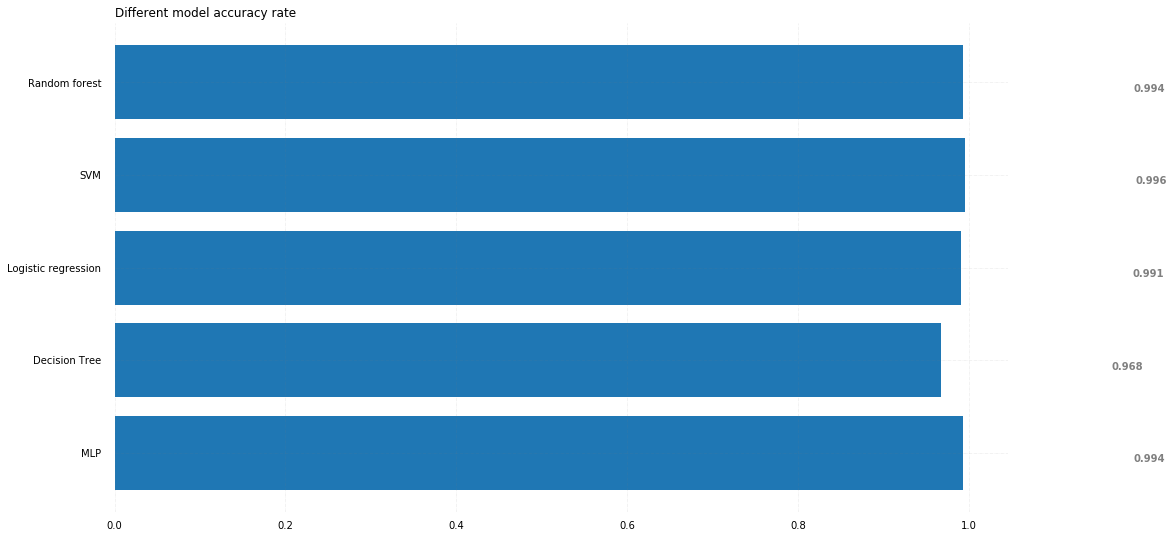

In [48]:
name = classifiers
accuracy = accuracy
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(name, accuracy)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 3)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Different model accuracy rate',
             loc ='left', )
# Show Plot
plt.show()

## From above graph, SVM is the best model for classifications whether email is phishing or not